In [364]:
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.tools.plotting import scatter_matrix

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [365]:
os.getenv('PUIDATA')

'/home/cusp/iy310/PUIdata'

In [366]:
nrg = pd.read_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")
bsize = pd.read_csv(os.getenv("PUIDATA") + "/pluto/MN.csv")

In [367]:
nrg.head()

,Record Number,BBL,Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Postcode,DOF Benchmarking Submission Status,...,DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,NTA
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,Office,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,82730.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,440360.0,NaN,1.0,40.749652,-74.006471,4.0,3.0,99.0,1012266.0,Hudson Yards-Chelsea-Flatiron-Union Square ...
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,Multifamily Housing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [368]:
nrg.columns

Index([u'Record Number', u'BBL', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Postcode',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings',
       u'Latitude', u'Longitude', u'Community Board', u'Council District',
       u'Census Tract', u'BI

In [369]:
# keeping only necessary colulmns
nrg=nrg[['BBL',"Site EUI(kBtu/ft2)",'Reported Property Floor Area (Building(s)) (ft²)',
         'DOF Property Floor Area (Buildngs and Parking)(ft2)','DOF Number of Buildings']]
nrg.columns

Index([u'BBL', u'Site EUI(kBtu/ft2)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'DOF Number of Buildings'],
      dtype='object')

In [370]:
bsize.columns

Index([u'Borough', u'Block', u'Lot', u'CD', u'CT2010', u'CB2010',
       u'SchoolDist', u'Council', u'ZipCode', u'FireComp', u'PolicePrct',
       u'HealthArea', u'SanitBoro', u'SanitDistrict', u'SanitSub', u'Address',
       u'ZoneDist1', u'ZoneDist2', u'ZoneDist3', u'ZoneDist4', u'Overlay1',
       u'Overlay2', u'SPDist1', u'SPDist2', u'SPDist3', u'LtdHeight',
       u'SplitZone', u'BldgClass', u'LandUse', u'Easements', u'OwnerType',
       u'OwnerName', u'LotArea', u'BldgArea', u'ComArea', u'ResArea',
       u'OfficeArea', u'RetailArea', u'GarageArea', u'StrgeArea',
       u'FactryArea', u'OtherArea', u'AreaSource', u'NumBldgs', u'NumFloors',
       u'UnitsRes', u'UnitsTotal', u'LotFront', u'LotDepth', u'BldgFront',
       u'BldgDepth', u'Ext', u'ProxCode', u'IrrLotCode', u'LotType',
       u'BsmtCode', u'AssessLand', u'AssessTot', u'ExemptLand', u'ExemptTot',
       u'YearBuilt', u'YearAlter1', u'YearAlter2', u'HistDist', u'Landmark',
       u'BuiltFAR', u'ResidFAR', u'CommFAR', u'

In [371]:
# keeping only necessary colulmns
bsize=bsize[["BBL","UnitsRes", "UnitsTotal", "YearBuilt"]]
bsize.columns

Index([u'BBL', u'UnitsRes', u'UnitsTotal', u'YearBuilt'], dtype='object')

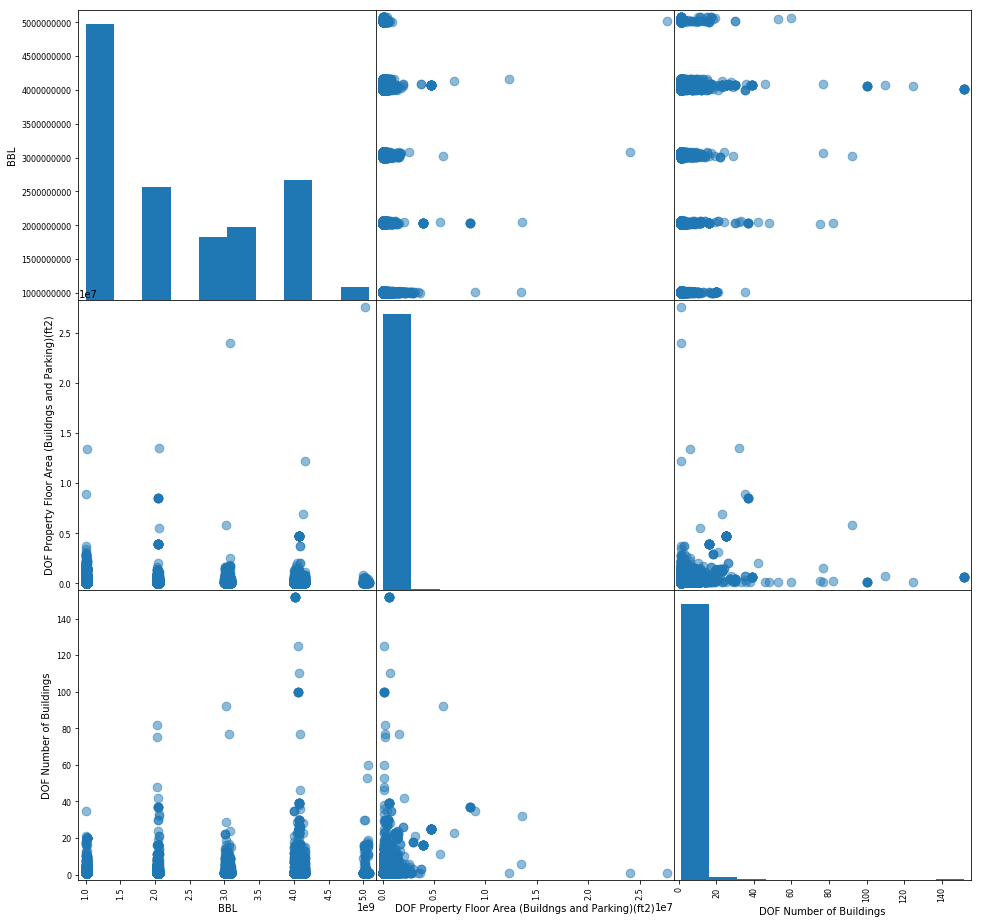

In [372]:
scatter_matrix (nrg, s=300, figsize=(16, 16));

Figure 1: scatter matrix of all numerical values in the files. Some NaN values seem to be creating many false readings due to outliars

In [373]:
bblnrgdata = pd.merge(nrg, bsize, on="BBL").dropna()
bblnrgdata.shape

(4789, 8)

In [374]:
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),DOF Number of Buildings,UnitsRes,UnitsTotal,YearBuilt
2,1.013110e+09,125.4,330000,313200.0,1.0,0,56,1977
15,1.007660e+09,122.3,59468,53168.0,1.0,0,8,1912
16,1.008150e+09,117,364000,364000.0,1.0,0,24,1954
18,1.005050e+09,82.1,235370,214110.0,1.0,0,24,1926
19,1.021420e+09,137.7,64806,64816.0,1.0,54,62,1924


In [375]:
bblnrgdata =bblnrgdata.rename(columns={'Site EUI(kBtu/ft2)': 'EUI', 
                                       'Reported Property Floor Area (Building(s)) (ft²)':'FloorArea',
                                        'DOF Property Floor Area (Buildngs and Parking)(ft2)':'DOF_FloorArea', 
                                        'DOF Number of Buildings': 'BuildingCount'})
bblnrgdata.columns

Index([u'BBL', u'EUI', u'FloorArea', u'DOF_FloorArea', u'BuildingCount',
       u'UnitsRes', u'UnitsTotal', u'YearBuilt'],
      dtype='object')

In [376]:
# convert any strings to numbers
bblnrgdata = bblnrgdata.apply(lambda x: pd.to_numeric(x,errors="coerce"))

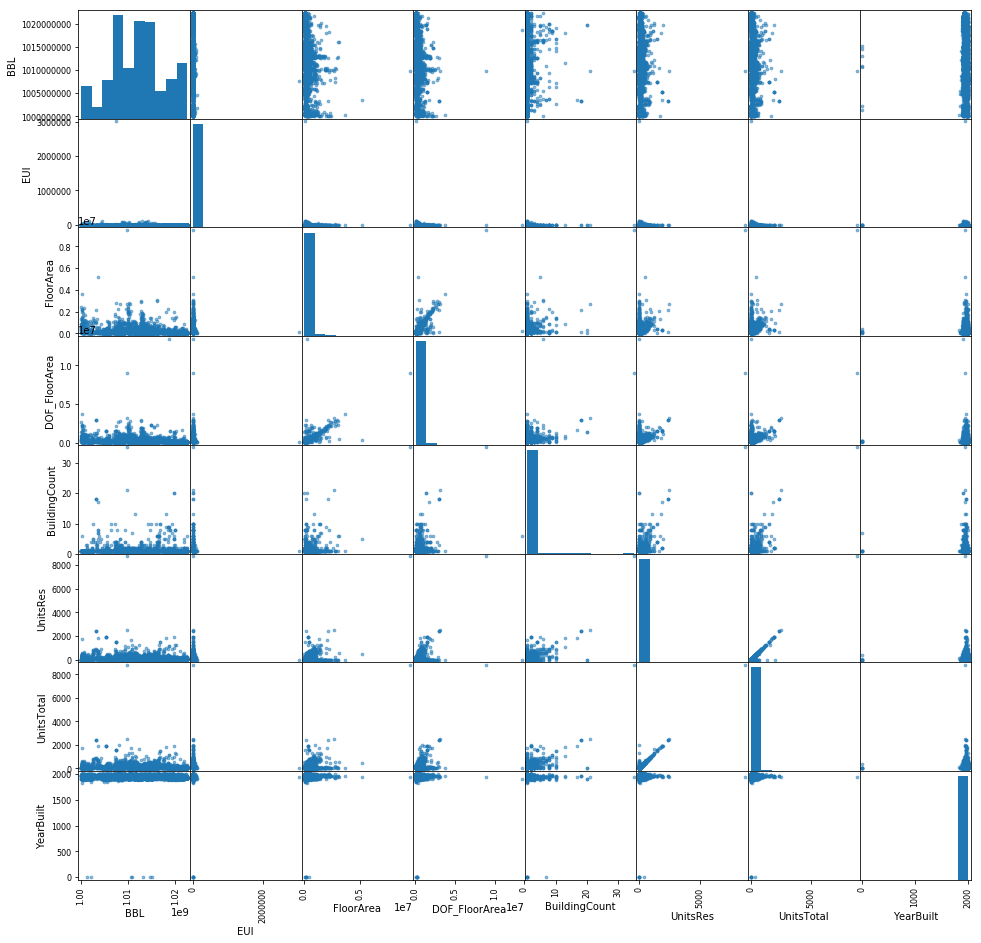

In [377]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16));

Figure 2: scatter matrix of new converted numerical values in the new dataset

We need it to be for energy TOTAL, not per sq ft

In [378]:
# find the EnergyTotal
bblnrgdata['EnergyTotal'] = bblnrgdata.EUI*bblnrgdata.FloorArea

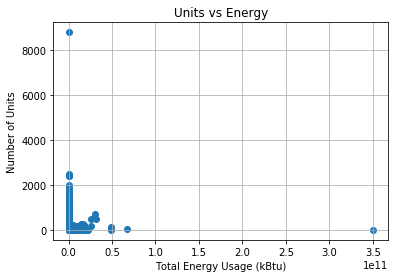

In [379]:
# first scatter plot
plt.scatter(bblnrgdata.EnergyTotal, bblnrgdata.UnitsTotal)
plt.grid()
plt.title("Units vs Energy")
plt.xlabel("Total Energy Usage (kBtu)")
plt.ylabel("Number of Units")

Fig.3  Number of units vs Total Energy Usage, scatter 

(0, 1000)

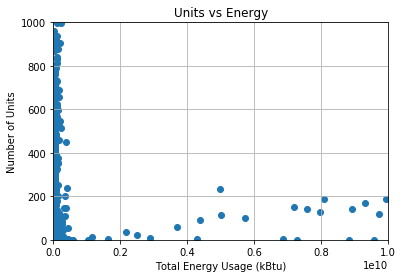

In [380]:
# zoomed in scatter plot
plt.scatter(bblnrgdata.EnergyTotal, bblnrgdata.UnitsTotal)
plt.grid()
plt.title("Units vs Energy")
plt.xlabel("Total Energy Usage (kBtu)")
plt.ylabel("Number of Units")
plt.xlim(0,10**10)
plt.ylim(0, 1000)

Fig.4  Number of units vs Total Energy Usage, scatter, zoomed in

In [381]:
# Cut out extremities
bblnrgdataCut = bblnrgdata[(bblnrgdata.EnergyTotal > 1000) * (bblnrgdata.UnitsTotal>=10) * 
                           (bblnrgdata.UnitsTotal<1000)]

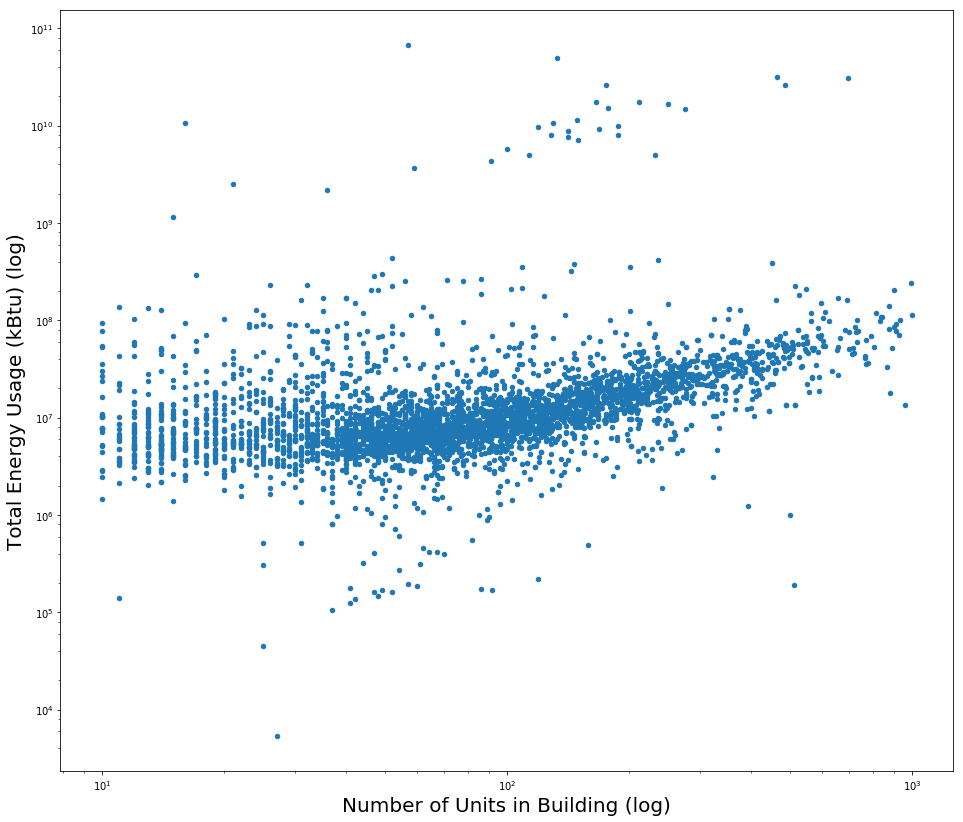

In [382]:
# Log scale
# on the original skeleton notebook, x and y seem to have been swapped
ax = bblnrgdataCut.plot(kind='scatter', x='UnitsTotal', y='EnergyTotal', 
                   marker='o',  figsize=(16, 14), loglog=True)
ax.set_xlabel("Number of Units in Building (log)", fontsize=20)
ax.set_ylabel("Total Energy Usage (kBtu) (log)", fontsize=20)

Fig.5 Plots Energy consumption per builiding (kBtu) VS Number of Units in Building, Log Scale

In [383]:
# Linear Model
x=bblnrgdataCut.UnitsTotal
y=bblnrgdataCut.EUI

X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit()

linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EUI   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     37.97
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           7.88e-10
Time:                        23:18:49   Log-Likelihood:                -1241.0
No. Observations:                4010   AIC:                             2486.
Df Residuals:                    4008   BIC:                             2499.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7521      0.025     68.772      0.000         1.702     1.802
UnitsTotal     0.0812      0.013      6.162      0.000         0.055     0.107
==============================================================================
Omnibus:                     3307.645   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           271415.317
Skew:                           3.404   Prob(JB):                         0.00
Kurtosis:                      42.725   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

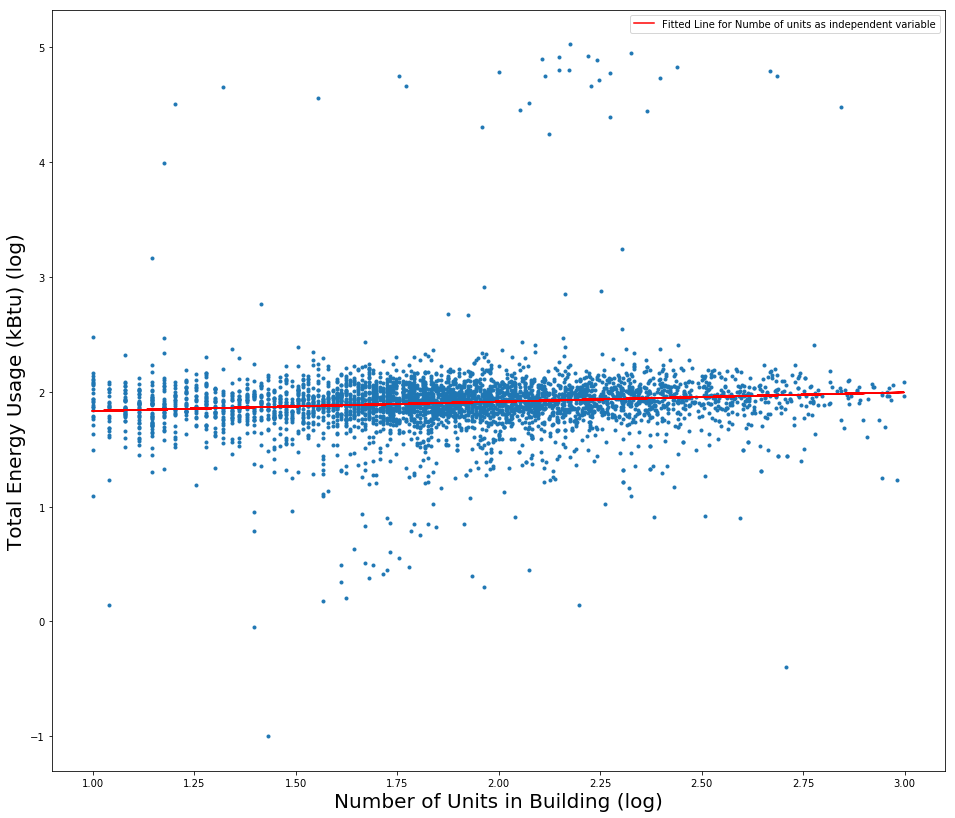

In [384]:
fig=pl.figure(figsize=(16,14))
ax=fig.add_subplot(111)
plot(np.log10(x),np.log10(y),".",label="")
plot(np.log10(x),np.log10(x)*linmodel.params[1]+linmodel.params[0],color="r", label="Fitted Line for Numbe of units as independent variable")
ax.legend()
y1 = ax.set_ylabel("Total Energy Usage (kBtu) (log)", fontsize=20)
x1 = ax.set_xlabel("Number of Units in Building (log)", fontsize=20)

Fig.7 Model Fit for Number of units as independent variable, log scale, with linear fit

In [385]:
# Now with TotalEnergy as independent variable; x
x2=bblnrgdata_cut.EUI
y2=bblnrgdata_cut.UnitsTotal

X = sm.add_constant(np.log10(x2))
linmodel2 = sm.OLS(np.log10(y2), X, missing='drop').fit() 
linmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     37.97
Date:                Mon, 23 Oct 2017   Prob (F-statistic):           7.88e-10
Time:                        23:18:49   Log-Likelihood:                -1950.9
No. Observations:                4010   AIC:                             3906.
Df Residuals:                    4008   BIC:                             3918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.6731      0.036     46.092      0.000         1.602     1.744
EUI            0.1156      0.019      6.162      0.000         0.079     0.152
==============================================================================
Omnibus:                       10.143   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.147
Skew:                           0.071   Prob(JB):                       0.0103
Kurtosis:                       2.814   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

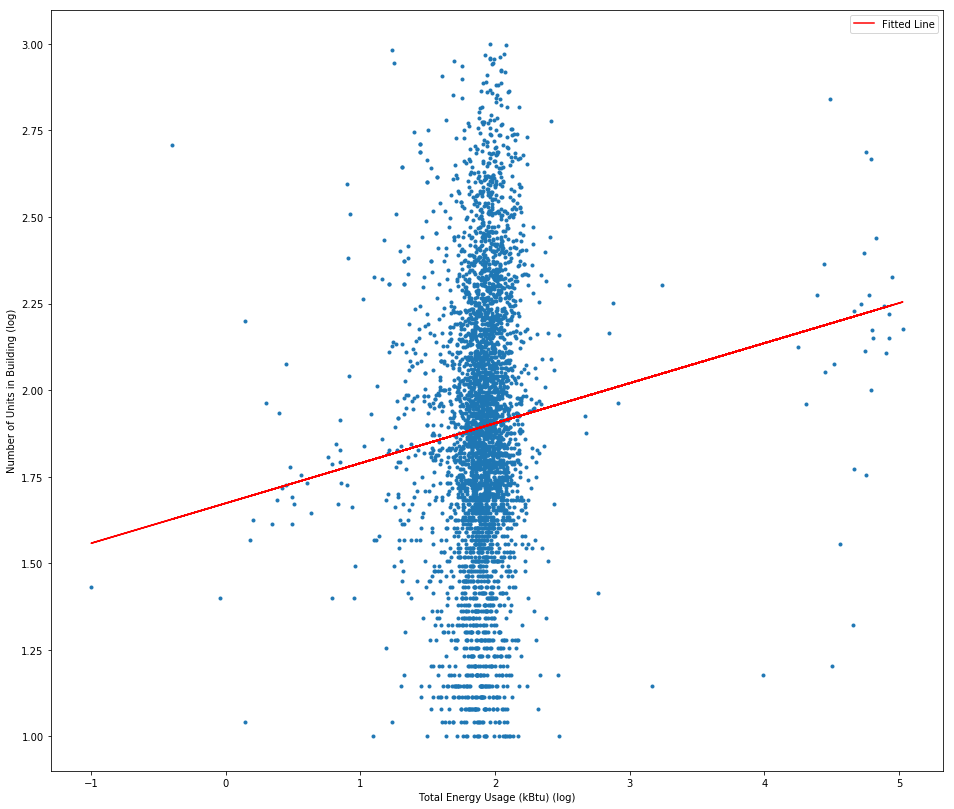

In [386]:
fig=pl.figure(figsize=(16,14))
ax=fig.add_subplot(111)
plot(np.log10(x2),np.log10(y2),".",label="")
plot(np.log10(x2),linmodel2.predict(),color="r", label="Fitted Line")
ax.legend()
ax.set_xlabel("Total Energy Usage (kBtu) (log)")
ax.set_ylabel("Number of Units in Building (log)");

Fig.8 Number of Units vs Total Energy with a fitted line, log scale, with linear fit

In [387]:
# Time to pick a nice model


def chi2(data, model, errors = None):
    '''Calculates the chi sq given data, model and errors
    Arguments:
    data: series of datapoints (endogenous variable)
    model: series of predicted values corresponding to the observed data
    errors: serie of errors (optional). 
    If errors are not passes all errors are set to 1
    '''
    if errors is None:
        errors = np.ones_like(data)
    if data.shape == model.shape and data.shape == errors.shape:
        return (((data - model)**2) / errors**2).sum()
    else: 
        print ('''ERROR:
must pass arrays of identical dimension for data, model and (optional) error)''')
    return -1


In [388]:

## Assume that there is error in the reported energy. 
## but that is the product of two measured qusntities, each of which will have errors. 
## The minimum error is the squareroot of the value

#Below I am writing out some uncertainties - please explain the functional form that I used.
#errors on the measured quantities
errorsnrg = np.sqrt((bblnrgdataCut.FloorArea)**2 +\
                (bblnrgdataCut.EUI**2))

## Assume count statistics in the number of units as well
errorsunits = np.sqrt(bblnrgdataCut.UnitsTotal)

#These errors need to be propagated properly through the log

In [389]:
errorsInLogNrg = np.abs(errorsnrg / bblnrgdataCut.EnergyTotal / np.log(10))
errorsInLogUnits = np.abs(errorsunits / bblnrgdataCut.UnitsTotal / np.log(10))

bblnrgdataCut['errorsnrg'] = errorsInLogNrg
bblnrgdataCut['errorsunits'] = errorsInLogUnits

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [390]:
chi1=(chi2(np.log10(y), linmodel.predict(), errorsInLogUnits))
chi2=(chi2(np.log10(y2), linmodel2.predict(),errorsInLogNrg))

print ("TotalUnits as x has ChiSq of",chi1)
print ("TotalEnergy as x has ChiSq of",chi2)

('TotalUnits as x has ChiSq of', 341456.14960767585)
('TotalEnergy as x has ChiSq of', 31804492099.729538)


In [391]:
logCut = np.log10(bblnrgdataCut[['EnergyTotal', 'UnitsTotal']])
sortedCut = logCut.sort_values(by='EnergyTotal')

In [392]:
# Quadratic model

quadmodel=smf.ols('UnitsTotal ~ I(EnergyTotal**2) + EnergyTotal', data=sortedCut).fit()
quadmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             UnitsTotal   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     456.2
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          3.28e-179
Time:                        23:18:51   Log-Likelihood:                -1558.5
No. Observations:                4010   AIC:                             3123.
Df Residuals:                    4007   BIC:                             3142.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept              -4.4164      0.413    -10.684      0.000        -5.227    -3.606
I(EnergyTotal ** 2)    -0.0711      0.007     -9.721      0.000        -0.085    -0.057
EnergyTotal             1.3994      0.110     12.733      0.000         1.184     1.615
==============================================================================
Omnibus:                      119.564   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.202
Skew:                          -0.401   Prob(JB):                     7.22e-30
Kurtosis:                       3.401   Cond. No.                     3.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

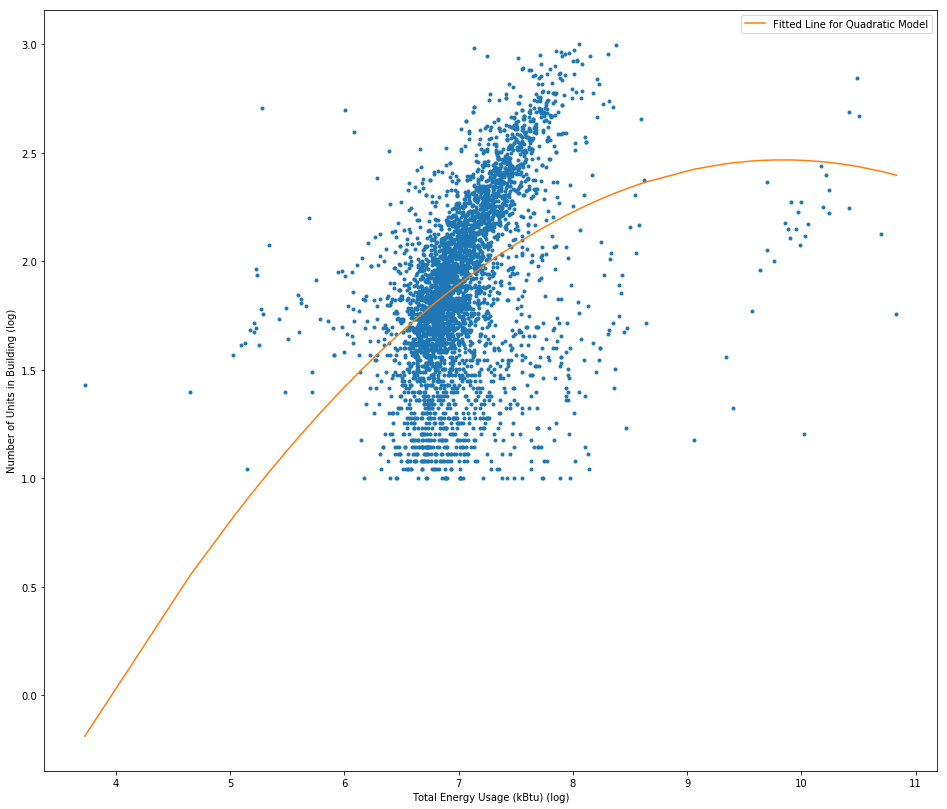

In [393]:
# Graph with the fit
fig=pl.figure(figsize=(16, 14))
ax=fig.add_subplot(111)
plot(logCut.EnergyTotal, logCut.UnitsTotal,".",label="")
plot(sortedCut.EnergyTotal,quadmodel.predict(),"-", label="Fitted Line for Quadratic Model")
ax.legend()
ax.set_xlabel("Total Energy Usage (kBtu) (log)")
ax.set_ylabel("Number of Units in Building (log)");

Fig.9 Number of Buildings vs Total Energy Usage, log scale, with quadratic fit

In [394]:
#using LR to compare both models
print ("LR : ", -2 * (-linmodel2.llf - (-quadmodel.llf)))
print ("LR from statsmodels:", quadmodel.compare_lr_test(linmodel2))

('LR : ', -784.75032496473614)
('LR from statsmodels:', (784.75032496473614, 1.1159757101857018e-172, 1.0))


Therefore, the null hypothesis of the simpler model being equal or better than the complex model is rejected because the P-value is much below 0.05. The alternative hypothesis of the simpler model being worse than the complex model is true. I.e. the quadratic model is better than the linear model. 

In [396]:
B = np.arange(-100, 100, 1)
A = np.arange(-50.0, 50.0, 0.5)

residuals = lambda x: chi2(logCut.TotalEnergy.values, logCut.TotalUnits.values*x[0] + x[1], errorsInLogNrg.values)

a = linmodel2.params[0] # intercept
b = linmodel2.params[1] # slope

Lsurface = np.zeros((len(A), len(B)))
for a,b in enumerate(A):
    for c,d in enumerate(B):
         Lsurface[a][c] = np.nansum(residuals)

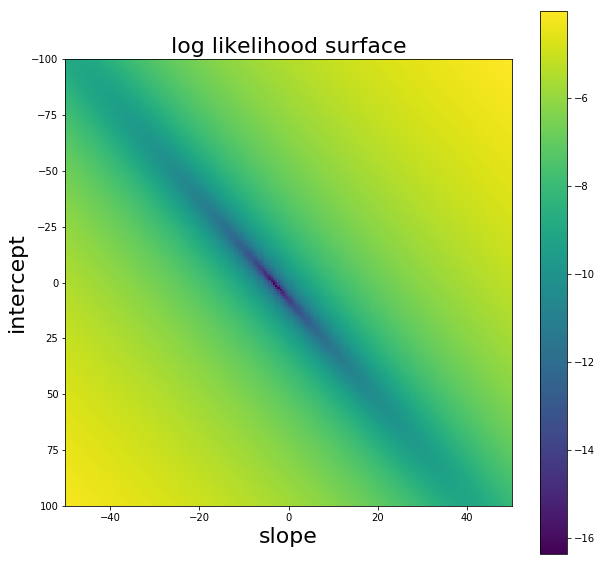

In [397]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


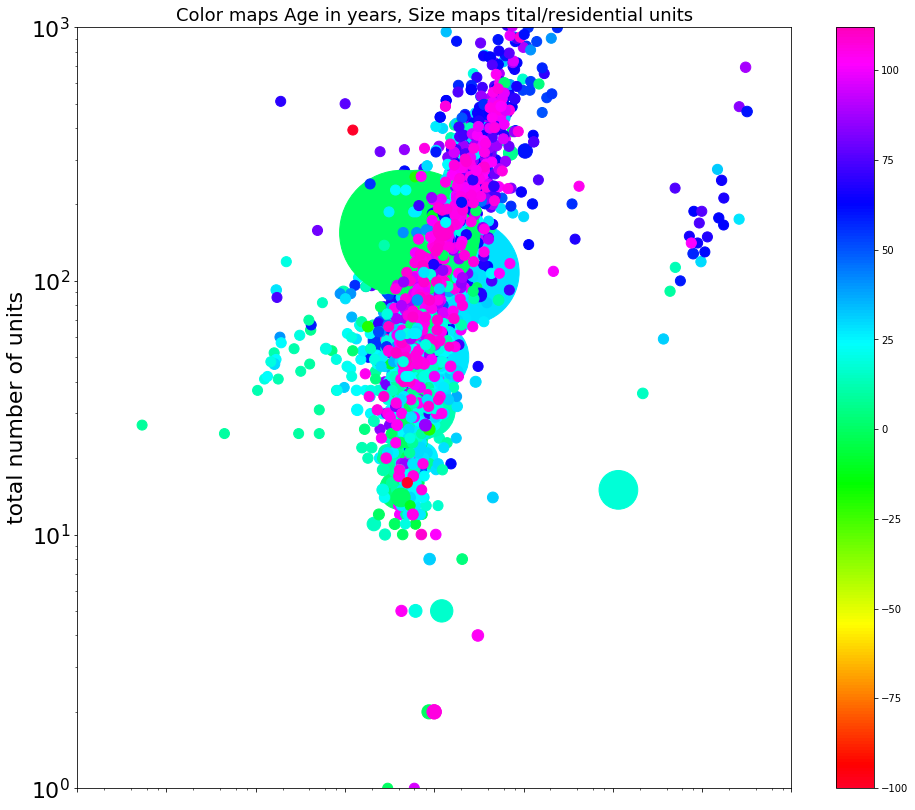

In [398]:
# Extra Credit 2

bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='EnergyTotal',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)

In [399]:
logCut.EnergyTotal.values

array([ 7.61681148,  7.62928725,  7.28609426, ...,  5.13251583,
        6.69696764,  7.6335027 ])